In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
%matplotlib inline

import PIL
import PIL.Image
import tensorflow_datasets as tfds
import pathlib
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import pandas as pd
import cv2
import os, sys
from PIL import Image
import PIL  

from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
from skimage import io

import tensorflow as tf

import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.optimizers import RMSprop


In [3]:
base_dir = "C:/Users/Ganpati Kumar Roy/Desktop/College Work/PBL-4/Dataset/Weather forecast/"
train_dir = "C:/Users/Ganpati Kumar Roy/Desktop/College Work/PBL-4/Dataset/Weather forecast/Train"
val_dir = "C:/Users/Ganpati Kumar Roy/Desktop/College Work/PBL-4/Dataset/Weather forecast/Test"
category = os.listdir(train_dir)

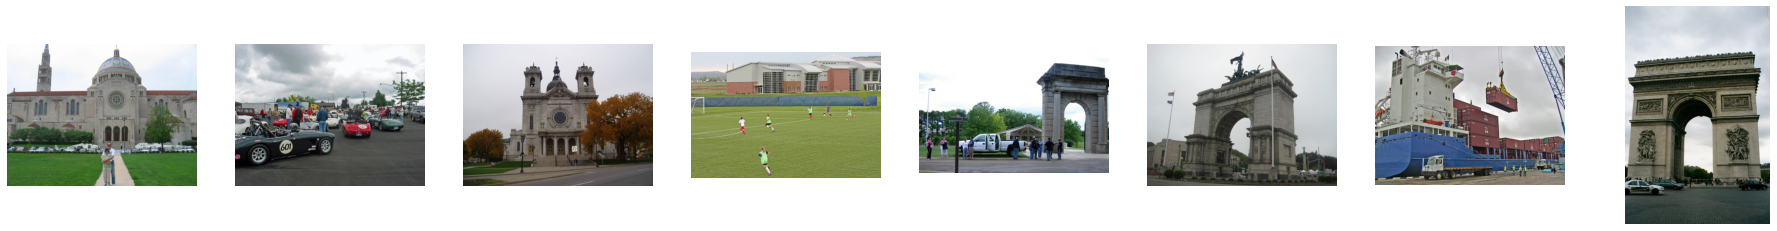

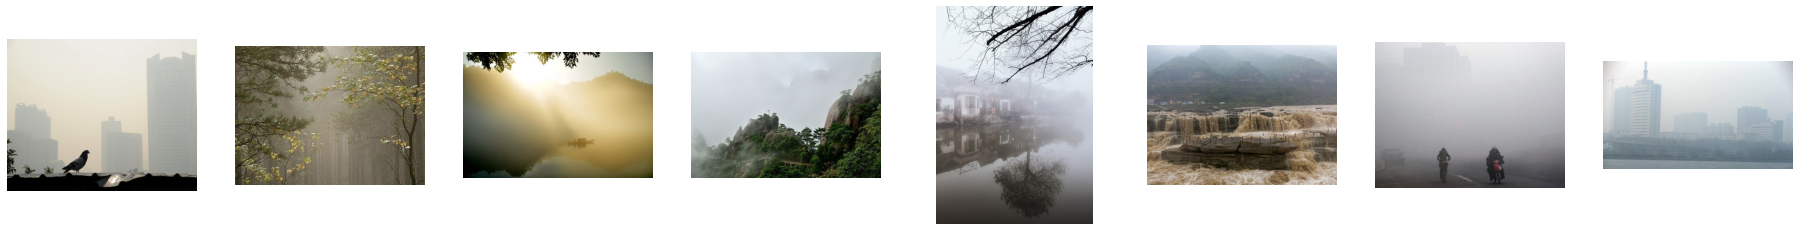

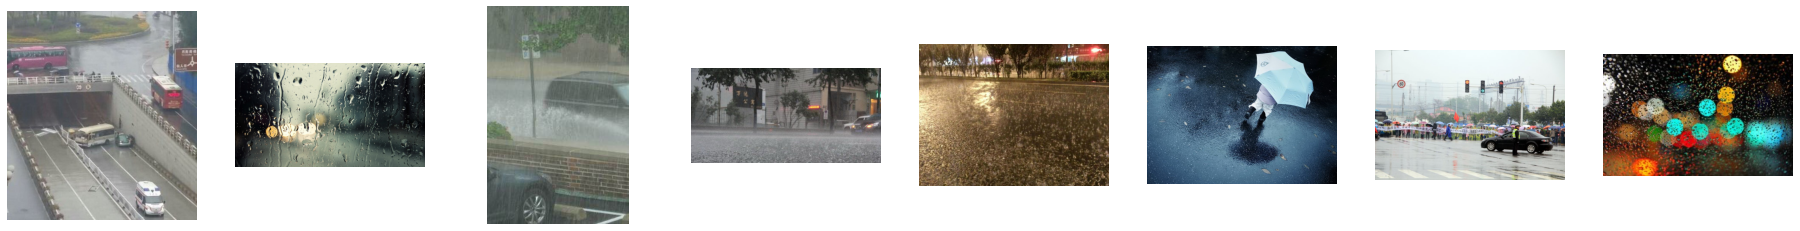

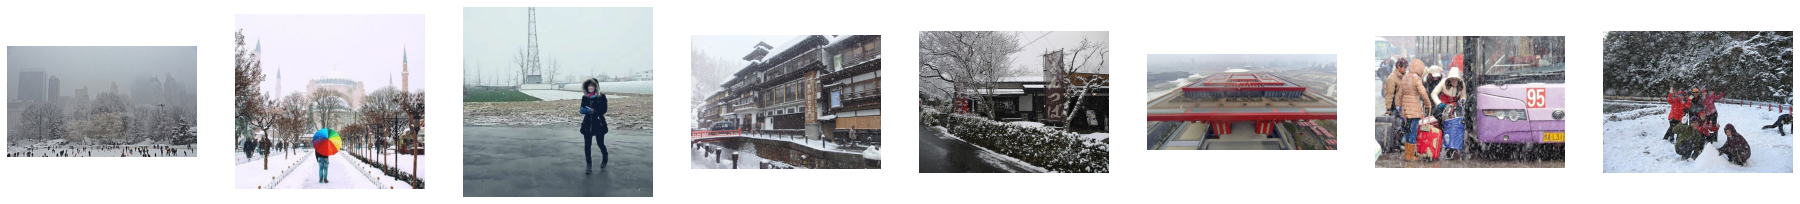

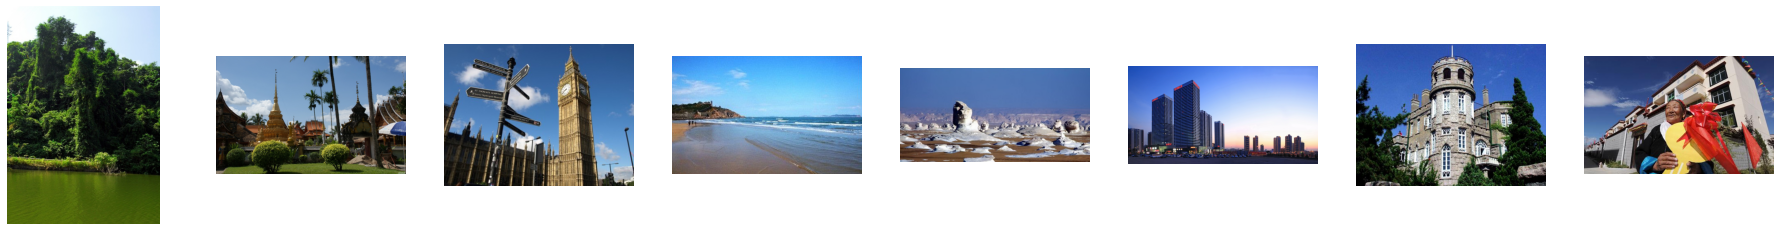

In [4]:
nrows = 1
ncols = 8
pic_index = 0


pic_index += 8

for it in category:
  fig = plt.gcf()
  fig.set_size_inches(ncols * 4, nrows * 4)
  train_cat_dir = os.path.join(train_dir, it)
  train_cat_fnames = os.listdir(train_cat_dir)
  next_pix = [os.path.join(train_cat_dir, fname) 
                  for fname in train_cat_fnames[pic_index-8:pic_index]]

  for i, img_path in enumerate(next_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') 

    img = mpimg.imread(img_path)
    plt.imshow(img)

  plt.show()

In [5]:
train_files = sum([len(files) for i, j, files in os.walk(train_dir)])
val_files = sum([len(files) for i, j, files in os.walk(val_dir)])
print(train_files, val_files)

18000 2000


In [6]:
n_classes = 5
epochs = 10
nb_train_samples = train_files
nb_validation_samples = val_files
num_epochs = epochs



img_width, img_height = 150, 150
train_data_dir = train_dir
validation_data_dir = val_dir
batch_size = 117



In [10]:
img_input = layers.Input(shape=(150, 150, 3))

model = Sequential([
    layers.experimental.preprocessing.Rescaling(scale=1./255),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


Found 18000 images belonging to 5 classes.
Found 2000 images belonging to 5 classes.


In [12]:
history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=num_epochs,
                    verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
 40/153 [======>.......................] - ETA: 8:04 - loss: 1.1188 - accuracy: 0.5750

C:\Users\Ganpati Kumar Roy\.conda\envs\tensorflow\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 2. Skipping tag 41486
  warnings.warn(
C:\Users\Ganpati Kumar Roy\.conda\envs\tensorflow\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 41487
  warnings.warn(


103/153 [===================>..........] - ETA: 3:19 - loss: 1.0142 - accuracy: 0.6131

C:\Users\Ganpati Kumar Roy\.conda\envs\tensorflow\lib\site-packages\PIL\TiffImagePlugin.py:771: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 4. Skipping tag 41486
  warnings.warn(


153/153 [==============================] - 641s 4s/step - loss: 0.9829 - accuracy: 0.6252 - val_loss: 0.8352 - val_accuracy: 0.6853
Epoch 2/10
153/153 [==============================] - 450s 3s/step - loss: 0.8529 - accuracy: 0.6765 - val_loss: 0.8053 - val_accuracy: 0.6898
Epoch 3/10
153/153 [==============================] - 441s 3s/step - loss: 0.8134 - accuracy: 0.6899 - val_loss: 0.7804 - val_accuracy: 0.7009
Epoch 4/10
153/153 [==============================] - 429s 3s/step - loss: 0.7739 - accuracy: 0.7051 - val_loss: 0.7655 - val_accuracy: 0.6993
Epoch 5/10
153/153 [==============================] - 423s 3s/step - loss: 0.7528 - accuracy: 0.7171 - val_loss: 0.7716 - val_accuracy: 0.7159
Epoch 6/10
153/153 [==============================] - 416s 3s/step - loss: 0.7267 - accuracy: 0.7275 - val_loss: 0.7428 - val_accuracy: 0.7240
Epoch 7/10
153/153 [==============================] - 416s 3s/step - loss: 0.7134 - accuracy: 0.7310 - val_loss: 0.7368 - val_accuracy: 0.7260
Epoch 8/10

In [13]:
history.history

{'loss': [0.9828581809997559,
  0.8528849482536316,
  0.8133565187454224,
  0.7738617062568665,
  0.752824604511261,
  0.7266671061515808,
  0.7134121060371399,
  0.6896401643753052,
  0.6723355650901794,
  0.6566123962402344],
 'accuracy': [0.6251747608184814,
  0.6764525175094604,
  0.6898730397224426,
  0.7050830125808716,
  0.7171056270599365,
  0.7275065779685974,
  0.7309735417366028,
  0.7385226488113403,
  0.7456802725791931,
  0.7521668672561646],
 'val_loss': [0.8351514935493469,
  0.8052645325660706,
  0.7804238796234131,
  0.7655259370803833,
  0.7715954184532166,
  0.7427967190742493,
  0.7368043065071106,
  0.7239909768104553,
  0.7257549166679382,
  0.720443606376648],
 'val_accuracy': [0.6852689981460571,
  0.6897938847541809,
  0.7008547186851501,
  0.6993464231491089,
  0.7159376740455627,
  0.7239819169044495,
  0.7259929776191711,
  0.73655104637146,
  0.7280040383338928,
  0.7355455160140991]}

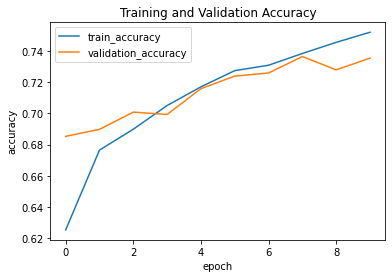

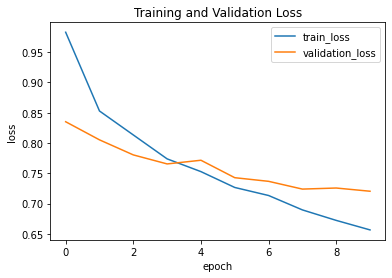

In [14]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy']) 
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()


def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()


plot_accuracy(history,'Training and Validation Accuracy')
plot_loss(history,'Training and Validation Loss')

# Confusion Matrix

In [15]:
validation_generator.reset()

predictions = model.predict_generator(generator = validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes

Instructions for updating:
Please use Model.predict, which supports generators.


In [16]:
from sklearn import metrics as m

print("Precision_weighted:", m.precision_score(y_test, y_pred, average="weighted")*100)
print("Recall_weighted:", m.recall_score(y_test, y_pred, average="weighted")*100)
print("F1_weighted:", m.f1_score(y_test, y_pred, average="weighted")*100)


Precision_weighted: 19.291736983627946
Recall_weighted: 19.2
F1_weighted: 19.174403781891563


In [17]:
labels_map = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels_map.items())
predict = [labels[k] for k in y_pred]

filenames = validation_generator.filenames
results = pd.DataFrame({"Filename":filenames,"Predictions":predict})

In [42]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y,predict_y):
    c = confusion_matrix(test_y, predict_y)
    
    print("Number of misclassified images: ", (len(test_y)-np.trace(c)))
    print("Percentage of misclassified images: ", (len(test_y)-np.trace(c))*100/len(test_y))
    
#     labels = [0,1,2,3,4,5]
    cmap = sns.light_palette("red")
    print("*"*10, "Confusion Matrix", "*"*10)
    plt.figure(figsize=(9,9))
    sns.heatmap(c, annot = True, cmap=cmap, fmt=".1f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Number of misclassified images:  1616
Percentage of misclassified images:  80.8
********** Confusion Matrix **********


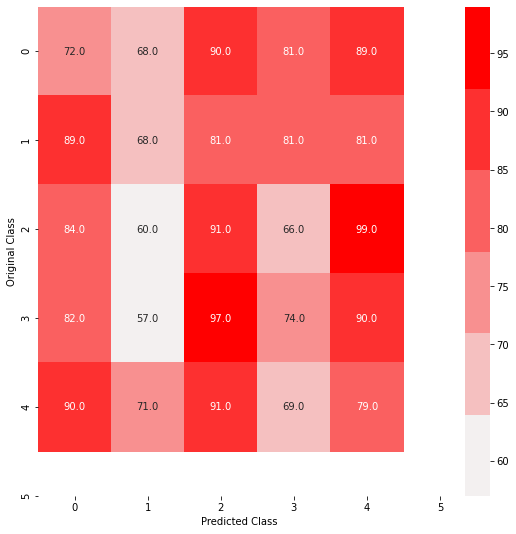

In [43]:
import seaborn as sns
plot_confusion_matrix(y_test, y_pred) 

# Predict From The Model

In [58]:
def predict_image(file):
    np_image = Image.open(file)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (150, 150, 3))
    image = np.expand_dims(np_image, axis = 0)
    pred= model.predict(image)
    k = np.argmax(pred,axis=1)
    clas=labels[k[0]]
    plt.imshow(plt.imread(file))
    plt.title("predicted:" +str(clas))
    plt.show()

In [59]:
from skimage import transform

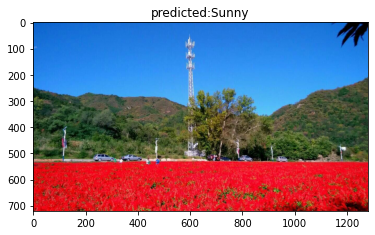

In [60]:
predict_image("C:/Users/Ganpati Kumar Roy/Desktop/College Work/PBL-4/Dataset/Weather forecast/Test/Sunny/SUNNY-3-6-3_051_ORI.jpg")

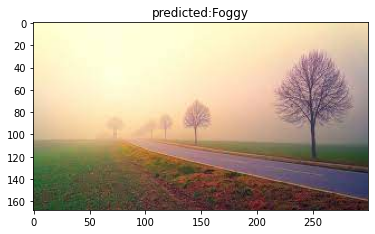

In [61]:
predict_image("C:/Users/Ganpati Kumar Roy/Desktop/College Work/PBL-4/Testing/foggy.jfif")

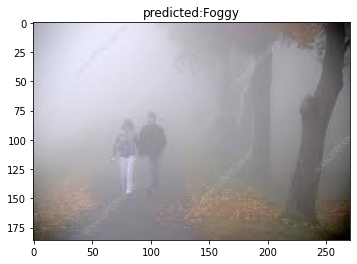

In [62]:
predict_image("C:/Users/Ganpati Kumar Roy/Desktop/College Work/PBL-4/Testing/foggy1.jfif")

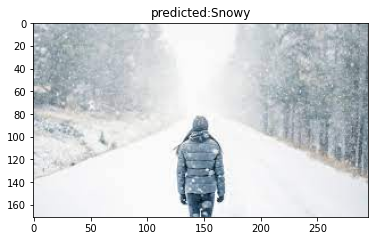

In [63]:
predict_image("C:/Users/Ganpati Kumar Roy/Desktop/College Work/PBL-4/Testing/snowy.jfif")

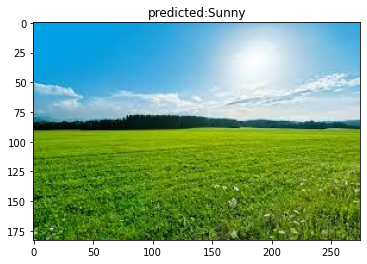

In [64]:
predict_image("C:/Users/Ganpati Kumar Roy/Desktop/College Work/PBL-4/Testing/sunny1.jfif")